In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
df = pd.read_csv("../data/venda_mkt.csv", sep = ";")

In [3]:
df

,Publicidade,Vendas
0,"985,69",120
1,"1445,56",360
2,"1188,19",270
3,"574,51",220
4,"568,95",170
...,...,...
182,"910,85",190
183,"888,57",240
184,"800,62",250
185,1500,230


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Publicidade  187 non-null    object
 1   Vendas       187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [5]:
# Substitui vírgulas por pontos na coluna "Publicidade" e converte os valores para o tipo float

# Seleciona a coluna "Publicidade" do DataFrame df
# Substitui todas as ocorrências de vírgula (",") por ponto (".") na string
df["Publicidade"] = df["Publicidade"].str.replace(",", ".")

# Converte os valores da coluna "Publicidade" para o tipo float
df["Publicidade"] = df["Publicidade"].astype(float)


In [6]:
# Calcula o coeficiente de correlação de Pearson e o valor p entre as colunas "Publicidade" e "Vendas" do DataFrame df
correlation, p_value = stats.pearsonr(df["Publicidade"], df["Vendas"])

# Exibe o coeficiente de correlação de Pearson e o valor p
print("Coeficiente de Correlação de Pearson:", correlation)
print("Valor p:", p_value)

Coeficiente de Correlação de Pearson: 0.6028225998334562
Valor p: 6.943414443341889e-20


A função pearsonr calcula o coeficiente de correlação de Pearson entre duas variáveis. Neste caso, entre as colunas "Publicidade" e "Vendas" do DataFrame df. A correlação de Pearson mede a força e a direção da relação linear entre duas variáveis. A função retorna dois valores:

correlation: O coeficiente de correlação de Pearson, que varia de -1 a 1. Um valor de 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita, e 0 indica nenhuma correlação linear.

p_value: O valor p associado ao teste de hipótese para a correlação. Um valor p baixo (geralmente < 0.05) sugere que a correlação observada é estatisticamente significativa.

In [7]:
# Calcula o coeficiente de correlação de Spearman e o valor p entre as colunas "Publicidade" e "Vendas" do DataFrame df
correlation, p_value = stats.spearmanr(df["Publicidade"], df["Vendas"])

# Exibe o coeficiente de correlação de Spearman e o valor p
print("Coeficiente de Correlação de Spearman:", correlation)
print("Valor p:", p_value)

Coeficiente de Correlação de Spearman: 0.5901383471933167
Valor p: 6.226559329632021e-19


A função spearmanr calcula o coeficiente de correlação de Spearman entre duas variáveis. Neste caso, entre as colunas "Publicidade" e "Vendas" do DataFrame df. A correlação de Spearman é uma medida não-paramétrica que avalia a relação monotônica entre duas variáveis. A função retorna dois valores:

correlation: O coeficiente de correlação de Spearman, que varia de -1 a 1. Um valor de 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita, e 0 indica nenhuma correlação monotônica.

p_value: O valor p associado ao teste de hipótese para a correlação. Um valor p baixo (geralmente < 0.05) sugere que a correlação observada é estatisticamente significativa.

In [8]:
X = df["Publicidade"] #feature = variável independente
y = df["Vendas"] #target = variável dependente

# 1) Linearidade

No contexto da regressão linear, linearidade refere-se à suposição de que existe uma relação linear entre as variáveis independentes (ou preditoras) e a variável dependente (ou resposta). Isso significa que a mudança na variável dependente pode ser explicada por mudanças proporcionais nas variáveis independentes. Em outras palavras, se representarmos a relação em um gráfico, a variável dependente pode ser expressa como uma soma de termos que são produtos de constantes (coeficientes) e as variáveis independentes, formando uma linha reta. Esta suposição é fundamental para a validade do modelo de regressão linear.

<Axes: xlabel='Publicidade', ylabel='Vendas'>

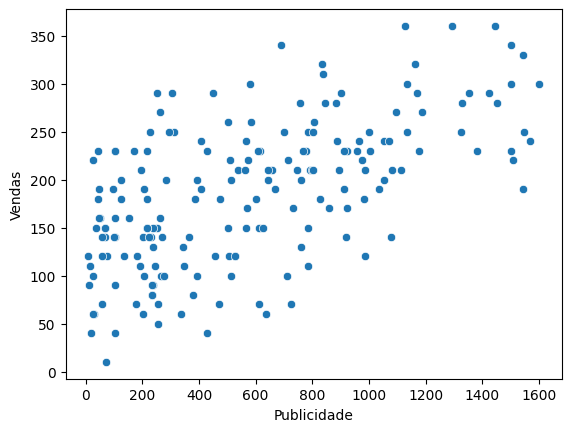

In [9]:
sns.scatterplot(data=df, x="Publicidade", y="Vendas")

Não temos nenhuma relação exponencial ou algo assim, então podemos tentar seguir pela linear

Para continuar, precisamos fazer o modelo e analisar os resíduos

In [10]:
#fit modelo linear
model = ols('Vendas ~ Publicidade', data=df).fit() #fitar um modelo

In [11]:
model.resid.mean()

np.float64(-3.2981341959345826e-14)

# 2) Homocedasticidade
# 5) O termo de erro tem uma média populacional de zero

No contexto da regressão linear, esses conceitos se referem a suposições fundamentais sobre os resíduos (ou termos de erro) do modelo:

- **Homocedasticidade**:
   Homocedasticidade significa que a variância dos erros (ou resíduos) é constante para todos os valores das variáveis independentes. Em outras palavras, a dispersão dos resíduos não deve aumentar ou diminuir sistematicamente com o nível das variáveis independentes. Essa suposição garante que o modelo de regressão linear seja eficiente e que as inferências estatísticas feitas com base nele sejam válidas.

- **O termo de erro tem uma média populacional de zero**:
   Esta suposição indica que os erros (ou resíduos) do modelo, em média, devem ser zero. Em outras palavras, se somarmos todos os erros do modelo, o resultado deve ser zero, indicando que o modelo não está sistematicamente subestimando ou superestimando a variável dependente. Isso assegura que os coeficientes estimados do modelo não sejam tendenciosos.

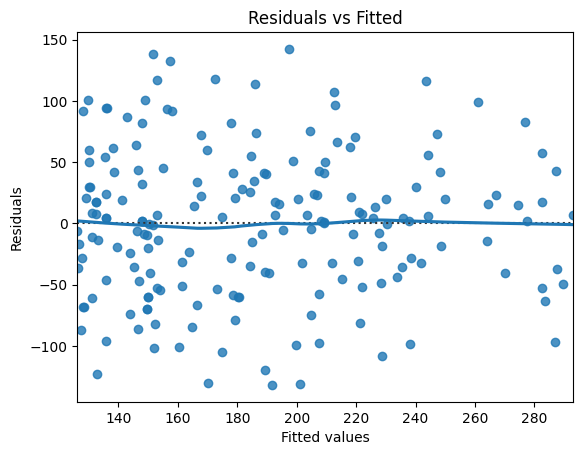

In [12]:
fig, ax = plt.subplots(1, 1)

fitted_values = model.predict()
residuals = model.resid


sns.residplot(x=fitted_values, y=residuals, lowess=True)


plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.show()

Pelo gráfico, a linha vermelha cai bem próxima a linha pontilhada. Isso indica que temos uma relação linear.

A homocedasticidade é a homogeneidade de variâncias. Caso exista a  homocedasticidade, os pontos são dispersos ao longo do eixo X (formato retangular), sem redução ou aumento de variâncias

# 3) Resíduos versus variável independente (exogeneidade)


No contexto da regressão linear, a suposição de exogeneidade significa que os resíduos (ou termos de erro) não estão correlacionados com as variáveis independentes. Em outras palavras, qualquer erro na predição da variável dependente não deve estar relacionado às variáveis independentes utilizadas no modelo. Essa suposição é crucial porque, se houver correlação entre os resíduos e as variáveis independentes, os coeficientes estimados podem ser tendenciosos, comprometendo a validade do modelo.

Se a exogeneidade for violada, isso indica que há alguma variável omitida ou um problema de especificação do modelo que precisa ser corrigido para que as estimativas do modelo sejam confiáveis e válidas para previsões e inferências.

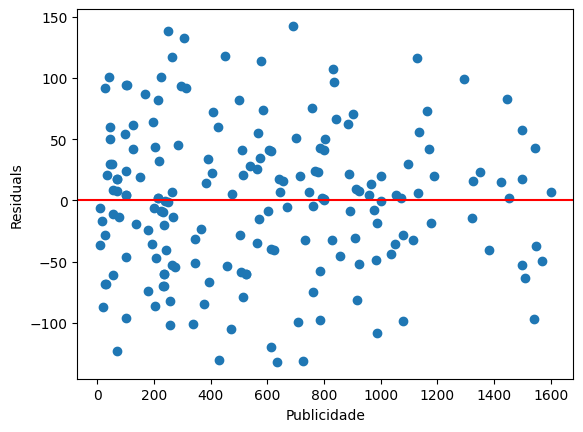

In [13]:
df_resid = df.copy()
df_resid["residuo"] = model.resid

plt.scatter(df_resid["Publicidade"], df_resid["residuo"])
plt.axhline(0, color='red')
plt.xlabel('Publicidade');
plt.ylabel('Residuals');

# 4) Autocorrelação de resíduos

A autocorrelação de resíduos refere-se à correlação entre os resíduos (ou erros) de diferentes observações no modelo de regressão. Em um modelo de regressão linear, assume-se que os resíduos são independentes entre si, ou seja, a correlação entre os resíduos de diferentes observações deve ser zero.

Quando há autocorrelação, os resíduos de uma observação podem estar correlacionados com os resíduos de outras observações, indicando que o modelo não capturou alguma estrutura subjacente nos dados. A autocorrelação é especialmente comum em dados de séries temporais, onde os valores de uma variável em um ponto no tempo podem estar correlacionados com os valores em pontos anteriores.

A presença de autocorrelação nos resíduos pode levar a erros padrão subestimados ou superestimados, comprometendo a validade dos testes de hipóteses e a precisão das previsões do modelo. Para detectar a autocorrelação, pode-se usar testes como o teste de Durbin-Watson. Se a autocorrelação for detectada, técnicas como a inclusão de termos de defasagem (lagged terms) ou a modelagem de erros correlacionados podem ser aplicadas para corrigir o problema.








In [14]:
model.resid

0     -108.624017
1       83.114334
2       20.124360
3       34.527797
4      -14.888702
          ...    
182    -30.769837
183     21.568366
184     40.798392
185    -52.598941
186    -97.634760
Length: 187, dtype: float64

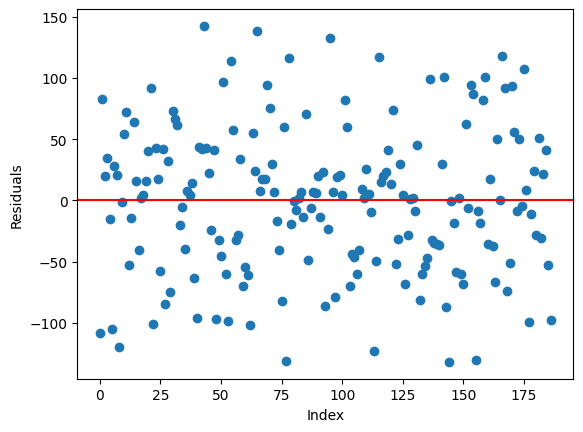

In [15]:
df_auto = model.resid.reset_index().rename(columns={0: "resid"})

plt.scatter(df_auto["index"] , df_auto["resid"])
plt.axhline(0, color='red')
plt.xlabel('Index');
plt.ylabel('Residuals');

Um bom teste para avaliar se há autocorrelação é o Durbin Watson. Se estiver próxima de 2, significa que não há autocorrelação (entre 1 e 3 é aceitável)

In [16]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

np.float64(1.9889098630777216)

# 6) Multicolonearidade

Nesse caso só temos 1 variável, então não é aplicavél.

 **Multicolinearidade**:

Multicolinearidade refere-se a uma situação em que duas ou mais variáveis independentes em um modelo de regressão linear estão altamente correlacionadas entre si. Isso significa que uma variável independente pode ser linearmente prevista a partir das outras com um grau de precisão substancial.

A presença de multicolinearidade pode causar vários problemas em um modelo de regressão:

- **Coeficientes instáveis**: Pequenas mudanças nos dados podem levar a grandes variações nos coeficientes estimados.
- **Difícil interpretação**: Fica difícil determinar o efeito individual de cada variável independente na variável dependente.
- **Aumento nos erros padrão**: Isso pode levar a testes estatísticos menos precisos, resultando em intervalos de confiança amplos e testes de significância não confiáveis.

Para detectar multicolinearidade, pode-se utilizar métricas como o Fator de Inflação da Variância (VIF). Um VIF alto (geralmente acima de 10) indica a presença de multicolinearidade.

Se a multicolinearidade for identificada, algumas abordagens para lidar com ela incluem:

- **Remover variáveis**: Excluir uma ou mais das variáveis altamente correlacionadas.
- **Combinar variáveis**: Criar uma nova variável que combina as variáveis correlacionadas.
- **Utilizar técnicas de regularização**: Métodos como regressão Ridge ou Lasso podem ajudar a mitigar os efeitos da multicolinearidade.

# 7) Resíduos tem distribuição normal


No contexto da regressão linear, assume-se que os resíduos (ou termos de erro) seguem uma distribuição normal. Esta suposição é importante por várias razões:

- **Validade dos testes de hipóteses**: Muitos testes estatísticos, como os testes t e F, assumem que os resíduos são normalmente distribuídos. A normalidade dos resíduos garante que as inferências sobre os coeficientes do modelo (tais como intervalos de confiança e testes de significância) sejam válidas.
- **Previsão precisa**: A normalidade dos resíduos ajuda a garantir que as previsões e os intervalos de previsão do modelo sejam precisos e confiáveis.

Para verificar se os resíduos seguem uma distribuição normal, pode-se utilizar:

- **Gráficos de probabilidade normal (Q-Q plots)**: Um gráfico Q-Q compara a distribuição dos resíduos com uma distribuição normal. Se os resíduos forem normalmente distribuídos, os pontos no gráfico Q-Q formarão aproximadamente uma linha reta.
- **Testes estatísticos**: Testes como o teste de Shapiro-Wilk ou o teste de Kolmogorov-Smirnov podem ser usados para testar a hipótese de normalidade dos resíduos.

Se os resíduos não forem normalmente distribuídos, isso pode indicar que o modelo não está adequadamente especificado ou que há a presença de outliers ou outras anomalias nos dados. Em tais casos, pode ser necessário transformar as variáveis, remover outliers ou utilizar métodos de modelagem robustos que não assumam normalidade dos resíduos.

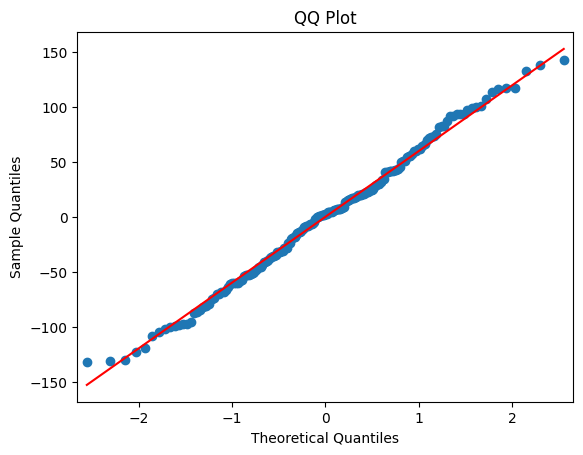

In [17]:

fig, ax = plt.subplots(1, 1)
sm.ProbPlot(model.resid).qqplot(line='s', ax=ax)
ax.title.set_text('QQ Plot')

# Avaliando o modelo

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     105.6
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           6.94e-20
Time:                        17:29:21   Log-Likelihood:                -1030.4
No. Observations:                 187   AIC:                             2065.
Df Residuals:                     185   BIC:                             2071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     125.1795      7.431     16.845      

O relatório de resultados da regressão linear (OLS) pode ser resumido da seguinte forma:

- **Variável dependente**: Vendas
- **Variável independente**: Publicidade
- **Número de observações**: 187
- **Coeficiente de determinação (R-squared)**: 0.363, indicando que aproximadamente 36,3% da variação nas vendas pode ser explicada pela publicidade.
- **Coeficiente da variável independente (Publicidade)**: 0.1049, com um erro padrão de 0.010. Este coeficiente é altamente significativo (p-valor < 0.0001), indicando que a publicidade tem um impacto positivo significativo nas vendas.
- **Intercepto**: 125.1795, significando que, quando o valor de publicidade é zero, o valor médio de vendas é 125.1795.
- **Estatísticas F**: 105.6, com um p-valor < 0.0001, indicando que o modelo é estatisticamente significativo.
- **AIC (Akaike Information Criterion)**: 2065 e **BIC (Bayesian Information Criterion)**: 2071, que são critérios usados para avaliar a qualidade do modelo.
- **Durbin-Watson**: 1.989, indicando que não há problemas significativos de autocorrelação dos resíduos.
- **Teste de normalidade dos resíduos (Omnibus, Jarque-Bera)**: Os resíduos parecem ser normalmente distribuídos, conforme indicado pelos p-valores elevados (0.417 para Omnibus e 0.480 para Jarque-Bera).
.

**P-valor do coeficiente Publicidade**

* P-valor menor que 0.05, portanto podemos interpretar o coeficiente de
Publicidade como sendo estatisticamente relevante

**Fórmula**
```
Vendas = 0,1049*Publicidade + 125,1795
```

* A cada 1 real em publicidade, aumentamos 0,1049 as vendas.

* Mesmo investindo 0 em publicidade, ainda esperaríamos uma venda de 125,1795

**R-quadrado**

* O investimento em publicidade explica 36% das vendas
* Mais usado na regressão simples

**Estatística F**
* Modelo criado versus modelo nulo (sem previsão, considerando que a venda está sempre na média).
* H0 da estatística: modelo criado prevê igual ao modelo nulo
* Se p-valor menor que 0.05, dizemos que esse modelo está melhor do que o modelo nulo

**[0.025      0.975]**
* Intervalo de confiança do coeficiente

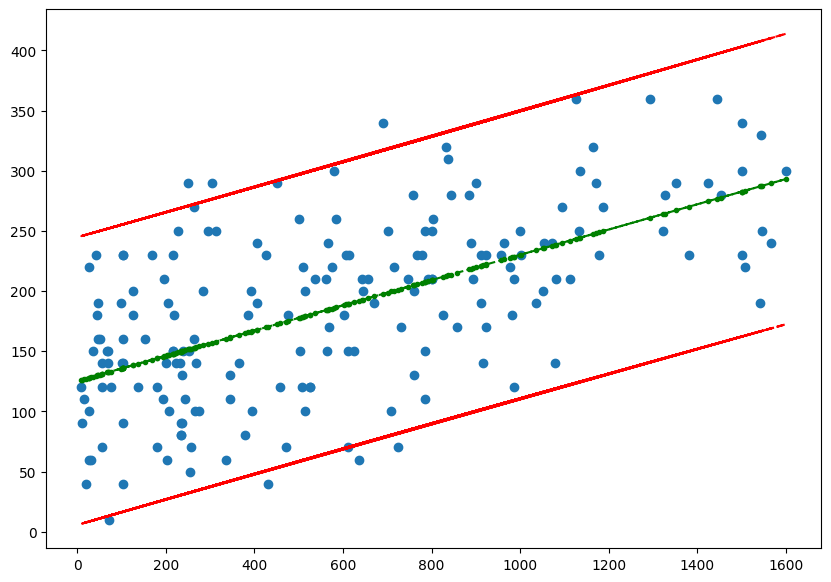

In [19]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#intervalo de confiança
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

#cria tamanho da imagem
fig, ax = plt.subplots(figsize=(10,7))

#plota os pontos
ax.plot(X, y, 'o', label="data")

#plota linha predito
ax.plot(X, model.predict(), 'g--.', label="OLS")

# plot intervalo de confiança
ax.plot(X, confidence_interval_upper, 'r--')
ax.plot(X, confidence_interval_lower, 'r--')


# Sumário

#### Verificação de Premissas da Regressão Linear

1. **Verificar a linearidade entre variáveis independentes e dependente:**
   ```python
   import seaborn as sns
   import matplotlib.pyplot as plt

   sns.pairplot(df, x_vars=['Publicidade'], y_vars='Vendas', height=5, aspect=1, kind='reg')
   plt.show()
   ```

2. **Verificar a homocedasticidade dos resíduos:**
   ```python
   import statsmodels.api as sm

   model = sm.OLS(df['Vendas'], sm.add_constant(df['Publicidade'])).fit()
   residuals = model.resid
   fitted = model.fittedvalues

   plt.scatter(fitted, residuals)
   plt.axhline(y=0, color='r', linestyle='--')
   plt.xlabel('Valores Ajustados')
   plt.ylabel('Resíduos')
   plt.show()
   ```

3. **Verificar exogeneidade (resíduos versus variável independente):**
   ```python
   plt.scatter(df['Publicidade'], residuals)
   plt.axhline(y=0, color='r', linestyle='--')
   plt.xlabel('Publicidade')
   plt.ylabel('Resíduos')
   plt.show()
   ```

4. **Verificar autocorrelação dos resíduos:**
   ```python
   from statsmodels.stats.stattools import durbin_watson

   dw_statistic = durbin_watson(residuals)
   print(f'Estatística de Durbin-Watson: {dw_statistic}')
   ```

5. **Verificar a multicolinearidade:**
   ```python
   from statsmodels.stats.outliers_influence import variance_inflation_factor

   X = sm.add_constant(df['Publicidade'])
   vif = pd.DataFrame()
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   vif["Variable"] = X.columns
   print(vif)
   ```

6. **Verificar se os resíduos têm distribuição normal:**
   ```python
   sm.qqplot(residuals, line='45')
   plt.show()

   from scipy.stats import shapiro

   shapiro_test = shapiro(residuals)
   print(f'Teste de Shapiro-Wilk: {shapiro_test}')
   ```